# Basic Waveforms

Illustration of sine/cosine waves and their overlapping. Applications in audio and images.

In [1]:
import logging
logging.basicConfig(level=logging.WARN,format='%(levelname)s - %(message)s')
#logging.getLogger("graph.undirectedgraph").setLevel(logging.INFO)

In [2]:
## Common imports
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

Let's start with some basics: plot multiples of $\cos(n\cdot x)$, the "harmonics":

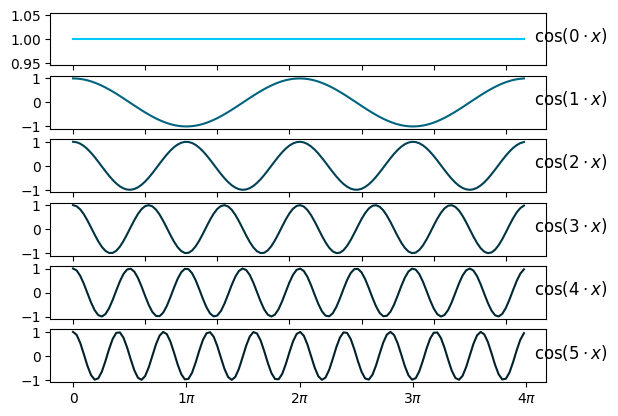

In [3]:
maxFreq = 5
maxX = 4
x = np.arange(0, maxX*np.pi, 0.1)

fig, axs = plt.subplots(maxFreq+1)
for i in range(maxFreq+1):
    axs[i].plot(x, np.cos(i*x), color=str('#00' + f"{int(200 / (i+1)):x}" + f"{int(255 / (i+1)):x}" ))
    axs[i].set_title(f"$\cos({i}\cdot x)$", x=1.05, y=0.30)

## Formatting
for ax in axs.flat:
    ax.label_outer()
axs[maxFreq].xaxis.set_major_locator(plt.MultipleLocator(np.pi))
axs[maxFreq].xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0' ))

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

plt.show()
fig.clear()
plt.close()

Now we overlap cosine functions:

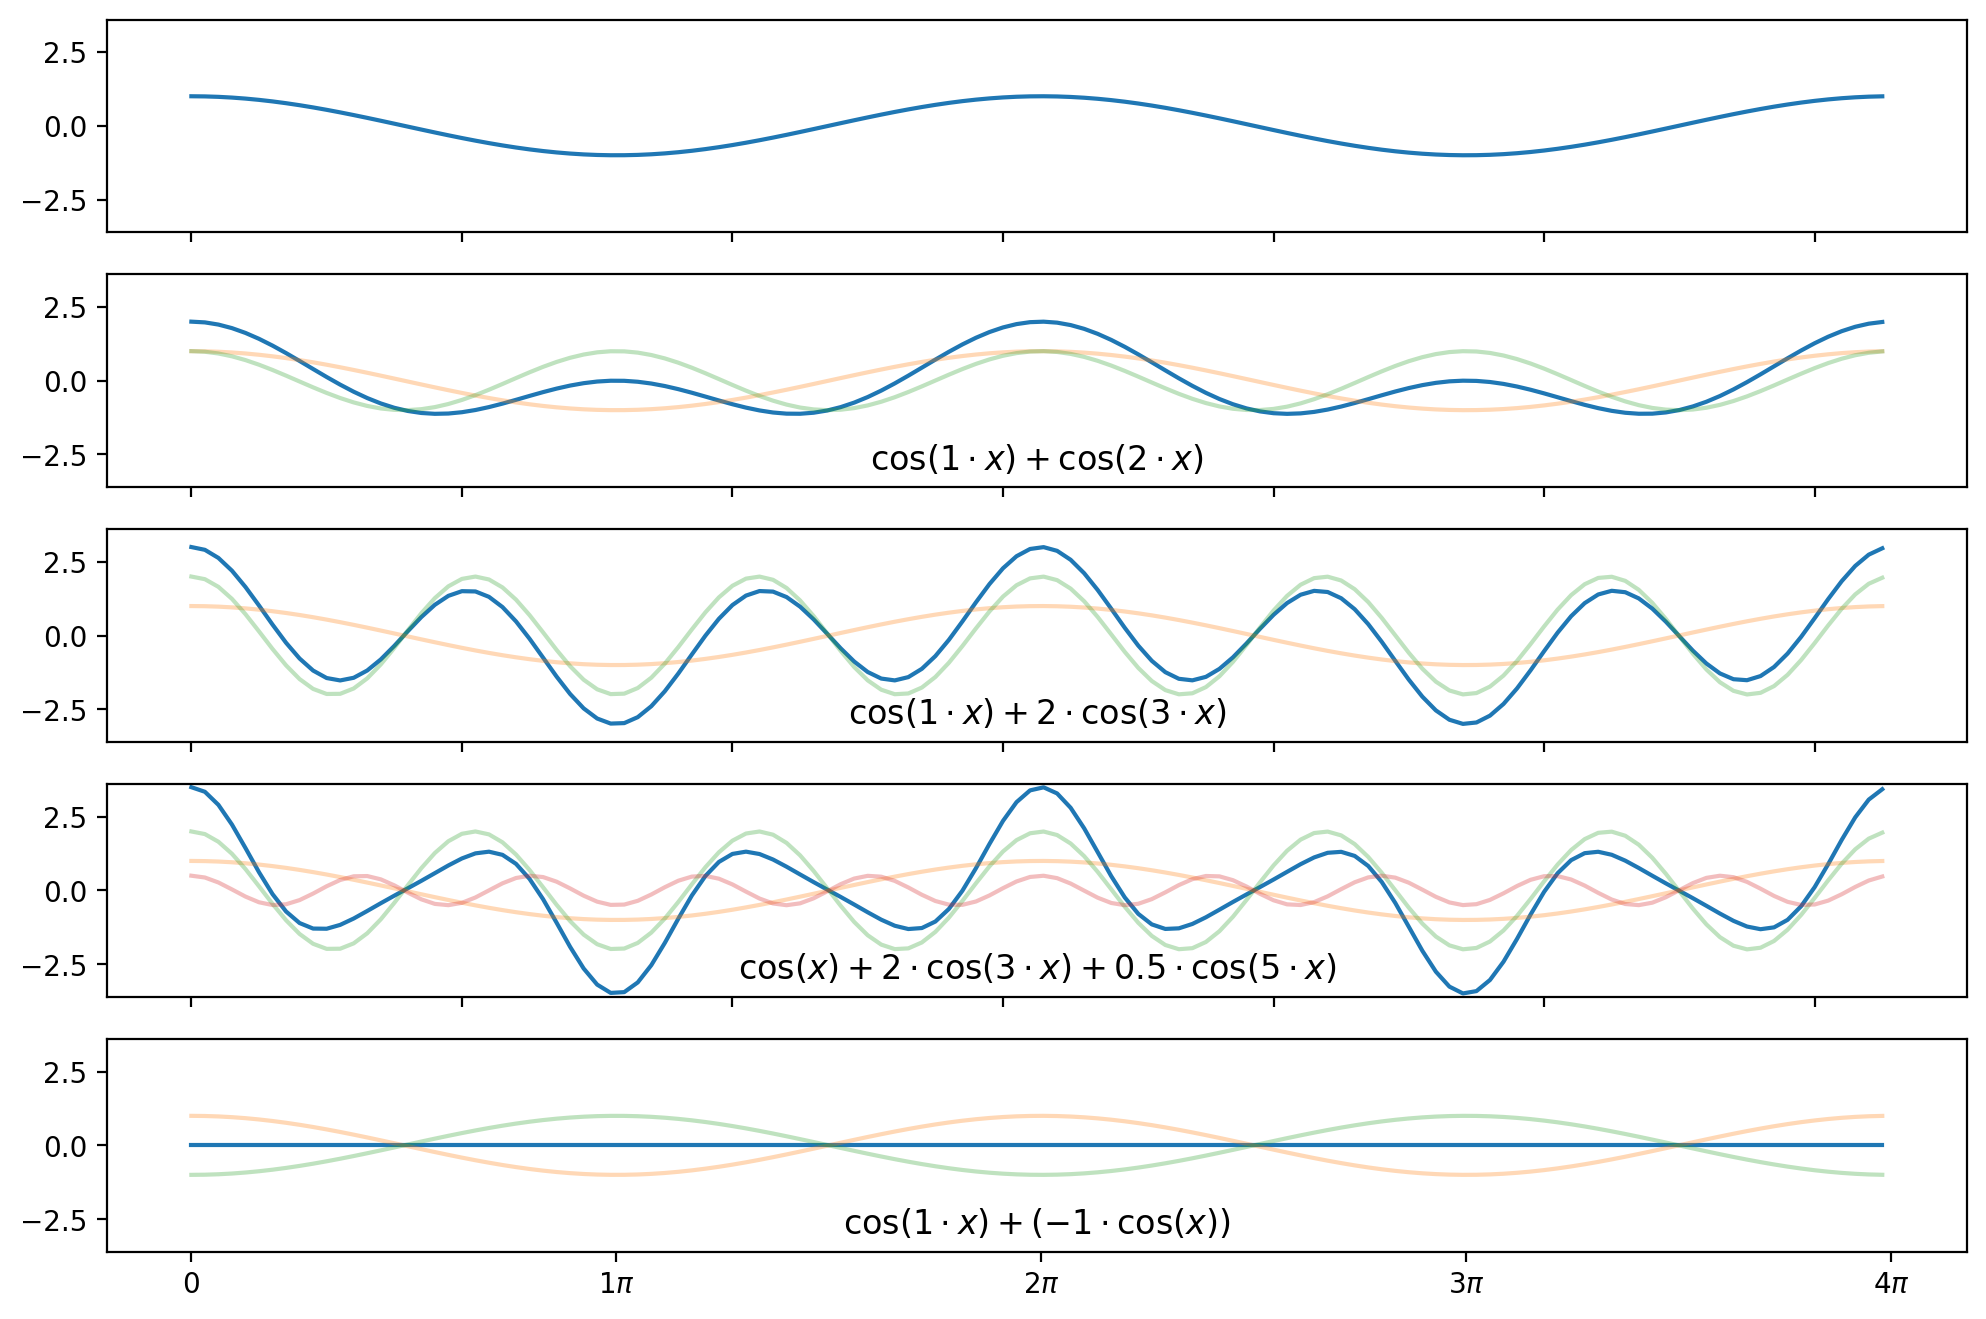

In [4]:
maxFreq = 4
maxX = 4
maxY=3.6
fig, axs = plt.subplots(maxFreq+1)
a = 0.3
i = 0


axs[i].plot(x, np.cos(1*x))
axs[i].set_ylim(-maxY,maxY)
i += 1

axs[i].plot(x, np.cos(1*x) + np.cos(2*x))
axs[i].plot(x, np.cos(1*x), alpha=a)
axs[i].plot(x, np.cos(2*x), alpha=a)
axs[i].set_title(f"$\cos(1\cdot x) + \cos(2\cdot x)$", y=0.005)
axs[i].set_ylim(-maxY,maxY)
i += 1

axs[i].plot(x, np.cos(1*x) + 2*np.cos(3*x))
axs[i].plot(x, np.cos(1*x), alpha=a)
axs[i].plot(x, 2*np.cos(3*x), alpha=a)
axs[i].set_ylim(-maxY,maxY)
axs[i].set_title(f"$\cos(1\cdot x) + 2\cdot\cos(3\cdot x)$", y=0.005)
i += 1

axs[i].plot(x, np.cos(1*x) + 2*np.cos(3*x) + 0.5*np.cos(5*x))
axs[i].plot(x, np.cos(1*x), alpha=a)
axs[i].plot(x, 2*np.cos(3*x), alpha=a)
axs[i].plot(x, 0.5*np.cos(5*x), alpha=a)
axs[i].set_ylim(-maxY,maxY)
axs[i].set_title(f"$\cos(x) + 2\cdot\cos(3\cdot x) + 0.5\cdot \cos(5\cdot x)$", y=0.005)
i += 1

axs[i].plot(x, np.cos(1*x) + -1*np.cos(x))
axs[i].plot(x, np.cos(1*x), alpha=a)
axs[i].plot(x, -1*np.cos(1*x), alpha=a)
axs[i].set_ylim(-maxY,maxY)
axs[i].set_title(f"$\cos(1\cdot x) + (-1\cdot\cos(x))$", y=0.005)
i += 1


## Formatting
for ax in axs.flat:
    ax.label_outer()
    
axs[maxFreq].xaxis.set_major_locator(plt.MultipleLocator(np.pi))
axs[maxFreq].xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0' ))

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

plt.show()
plt.close()

## Audio Signals

Audio Signals are overlapping sine waves. Let's explore that!

In [19]:
import numpy as np
from IPython.display import Audio

def createWave(frequencies:list[int]) -> np.ndarray :
    """
    Creates overlapping sine waves with given frequency and return them in discrete array.

    Args:
        frequencies (list[int]): List of overlapping frequencies in Hertz

    Returns:
        np.ndarray: _description_
    """
    returnVal = 0
    for hertz in frequencies:
        returnVal += np.sin(2*np.pi * hertz * np.arange(25000*2)/15000)

    return returnVal

#wave = createWave([442])
#wave = createWave([221])
#wave = createWave([110])
#wave = createWave([442, 221])
wave = createWave([442, 221, 110])
#wave = createWave([884, 442, 221, 110])

In [20]:
# Play the sinus wave (tone)
Audio(wave, rate=10000, autoplay=True)

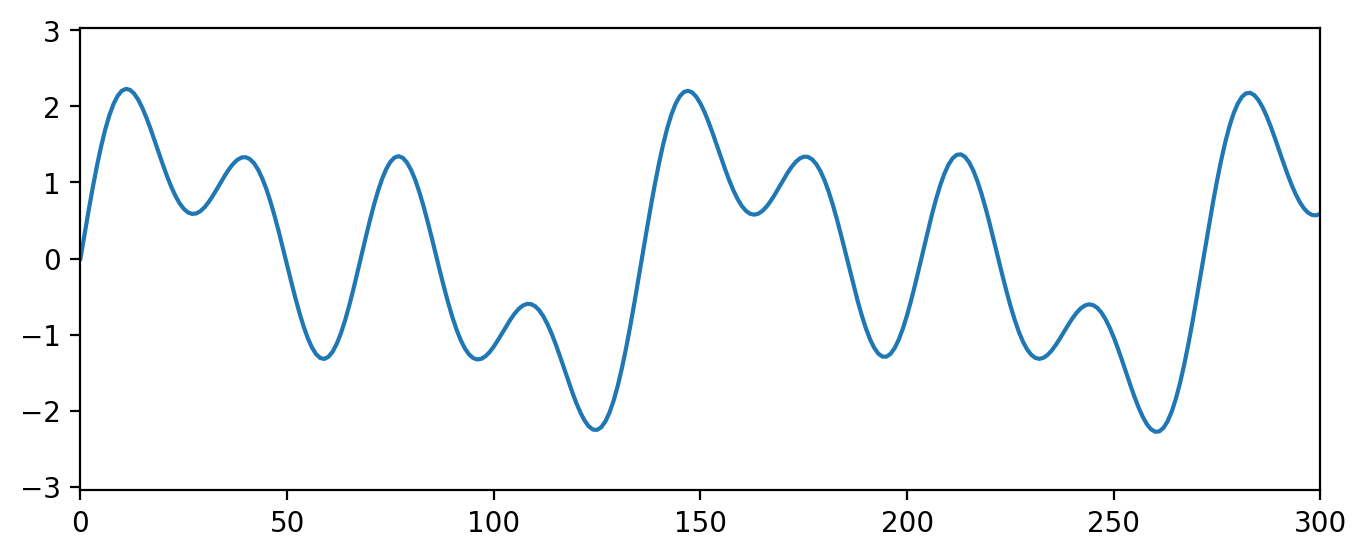

In [21]:
# Plot the waveform

plt.rcParams['figure.figsize'] = [8, 3]

plt.xlim(0, 300)
plt.plot(wave, '-')

In [8]:
# Print the first entries of the sine wave
print(wave[0:100])

[ 0.          0.18408859  0.36188491  0.52731175  0.67471471  0.79905546
  0.89608394  0.96248366  0.99598501  0.99544292  0.9608759   0.89346547
  0.79551578  0.67037482  0.52231998  0.35641188  0.17832138 -0.00586427
 -0.18984948 -0.3673455  -0.53228539 -0.67903141 -0.80256766 -0.89867159
 -0.96405832 -0.99649286 -0.99486659 -0.95923509 -0.89081628 -0.79194875
 -0.66601187 -0.51731024 -0.35092659 -0.17254803  0.01172834  0.19560383
  0.37279345  0.53724073  0.68332475  0.80605226  0.90122834  0.96559982
  0.99696643  0.99425605  0.9575613   0.88813645  0.78835448  0.66162601
  0.51228271  0.34542923  0.16676875 -0.01759201 -0.20135146 -0.37822858
 -0.54217759 -0.68759459 -0.80950913 -0.9037541  -0.96710812 -0.99740572
 -0.99361131 -0.95585458 -0.88542608 -0.7847331  -0.65721741 -0.50723757
 -0.33992    -0.16098373  0.02345507  0.20709217  0.38365071  0.5470958
  0.69184078  0.81293817  0.90624877  0.96858316  0.99781071  0.9929324
  0.95411498  0.88268525  0.78108473  0.6527862   0.5

## Image processing

Plot 1D gray-scale images where the brightness is given by a cosine function. A function value of 0 indicates "black", function value of 1 indicates "white".

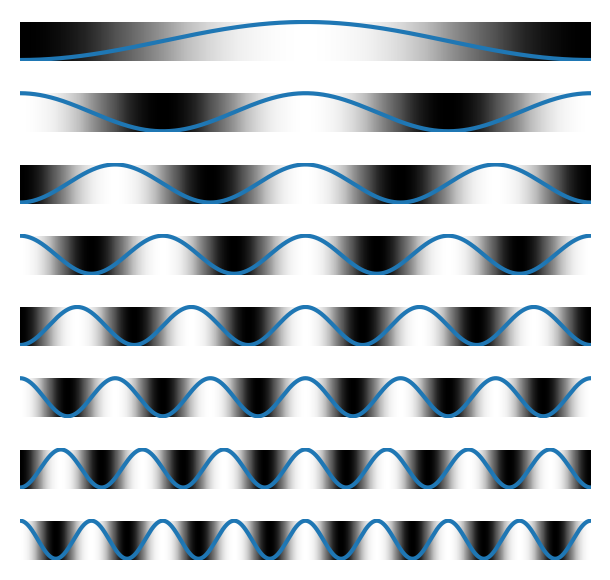

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

size_x = 1500
size_y = 100
wavelength_x = (size_x*2)

x = np.arange(-size_x, size_x, 1)
y = np.arange(-size_y, size_y, 1)
X, Y = np.meshgrid(x, y)

max_plots_y = 8
fig, axs = plt.subplots(max_plots_y,1)
for row in range(max_plots_y):
    grating = np.cos(2 * np.pi * (row+1) * X / wavelength_x)
    axs[row].imshow(grating, cmap=cm.Greys_r)
    function = (size_y) * (0.93- np.cos(2 * np.pi * (row+1) * x / wavelength_x)) # 1 -, looks inverse
    axs[row].plot(function)
    axs[row].axis("off")

## Function only
# fig, axs = plt.subplots(max_plots_y,1)
# for row in range(max_plots_y):
#     function = np.cos(2 * np.pi * (row+1) * x / wavelength_x)
#     axs[row].plot(function)
#     axs[row].axis("off")

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200

plt.tight_layout()
plt.show()


We now do some overlay of cosine functions of different orders - and weigh each of them differently.

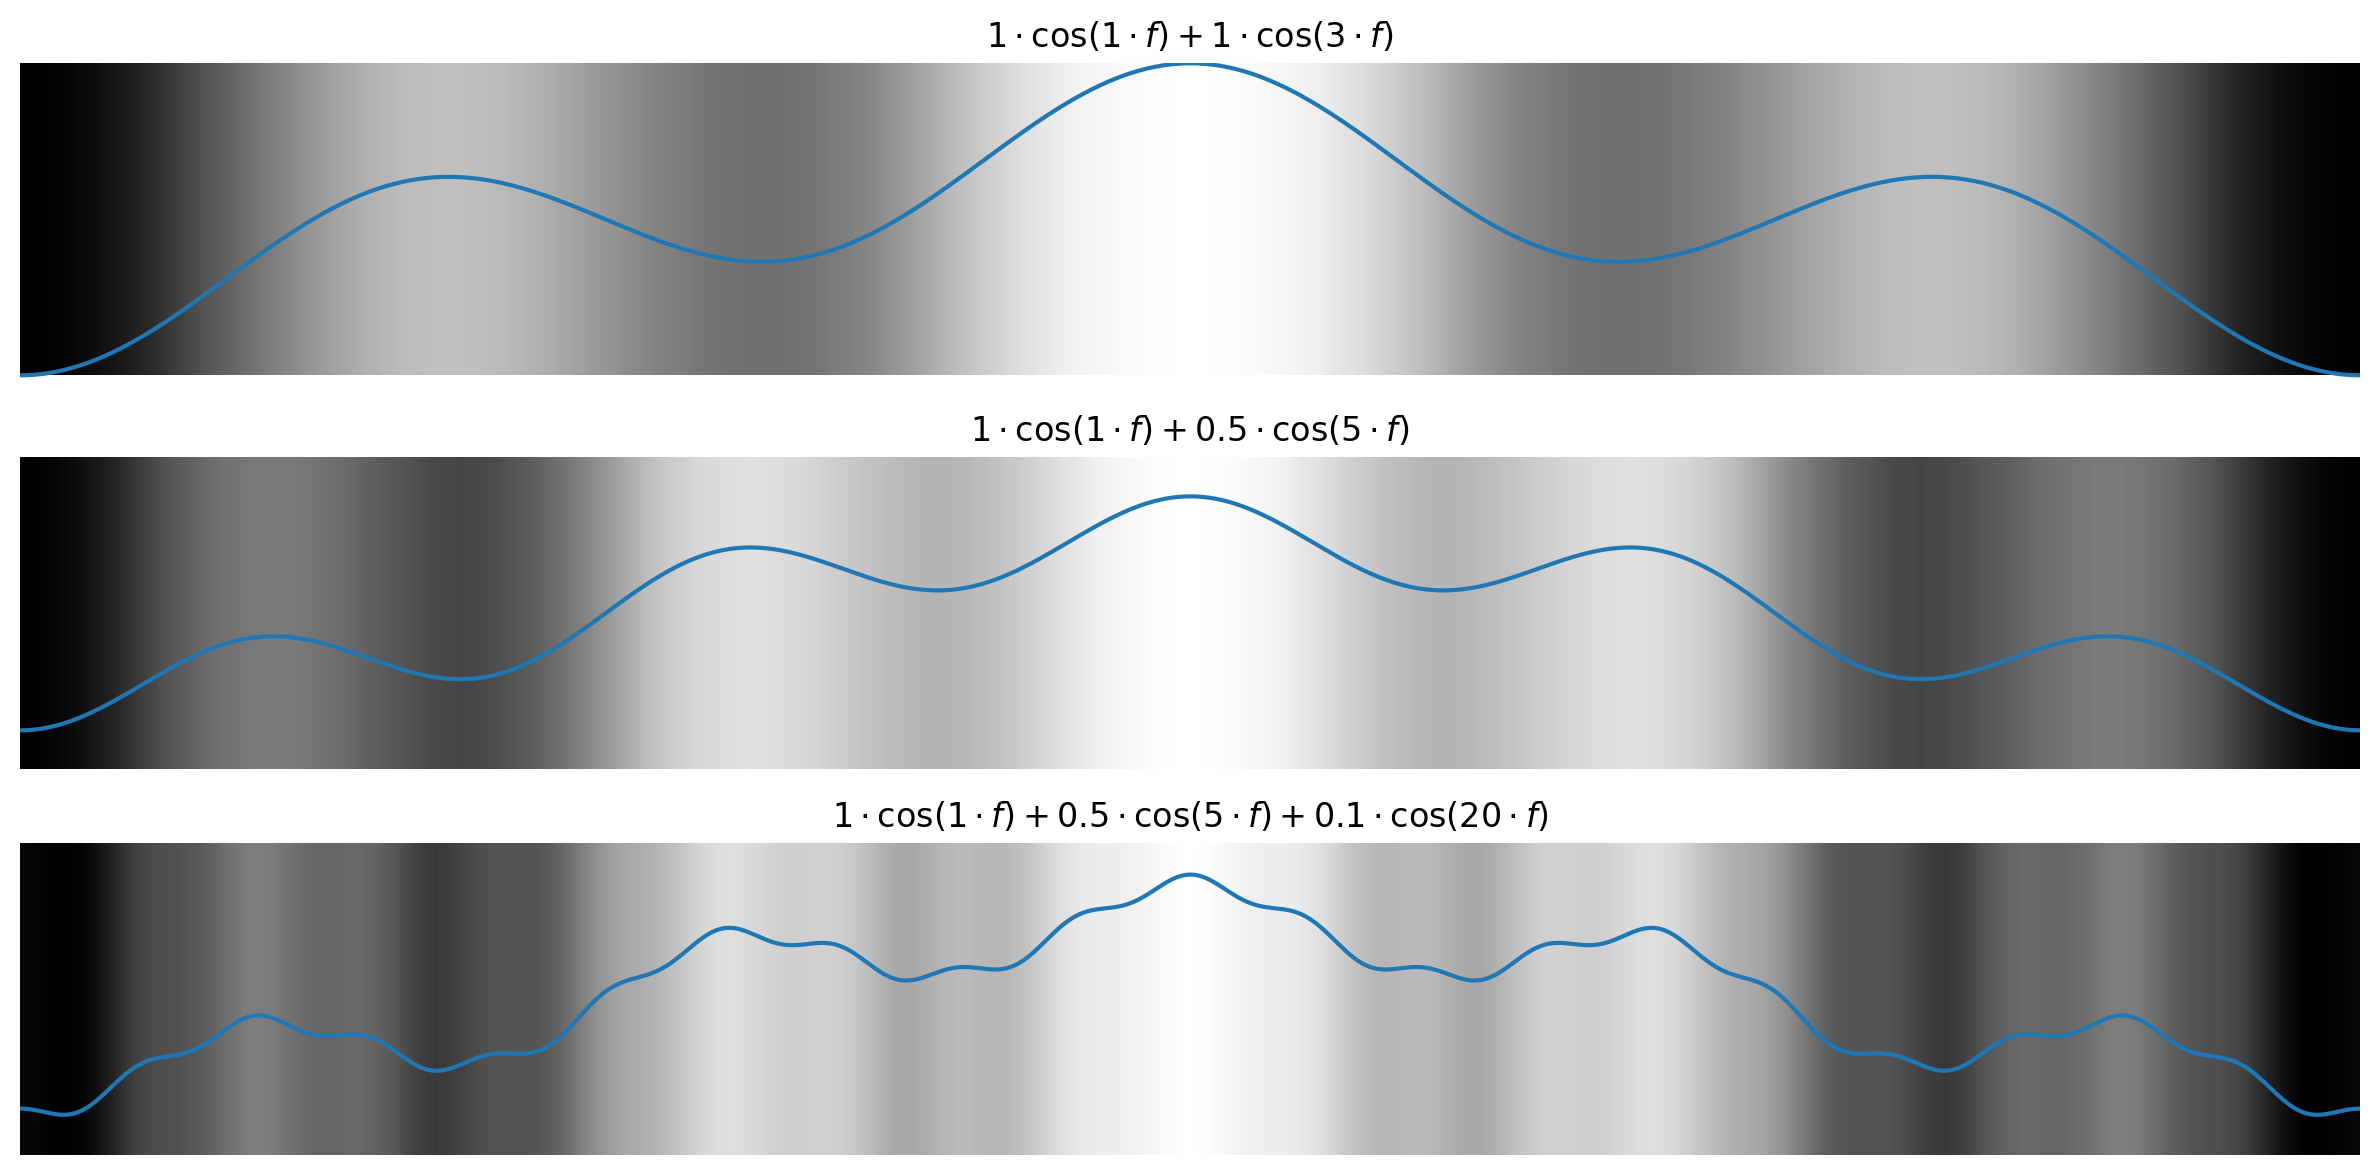

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

size_x = 1500
size_y = 200
wavelength_x = (size_x*2)
f = 1/wavelength_x

x = np.arange(-size_x, size_x, 1)
y = np.arange(-size_y, size_y, 1)
X, Y = np.meshgrid(x, y)

max_plots_y = 3
fig, axs = plt.subplots(max_plots_y,1)

grating = np.cos(2*np.pi * 1*f * X) + np.cos(2*np.pi * 3*f * X)
axs[0].imshow(grating, cmap=cm.Greys_r)
function = size_y - (size_y/2) * ( np.cos(2*np.pi * 1*f * x) + np.cos(2*np.pi * 3*f * x) )
axs[0].set_title(f"$1\cdot\cos(1\cdot f) + 1\cdot\cos(3\cdot f)$")
axs[0].plot(function)
axs[0].axis("off")

grating = np.cos(2*np.pi * 1*f * X) + 0.5*np.cos(2*np.pi * 5*f * X)
axs[1].imshow(grating, cmap=cm.Greys_r)
function = size_y - (size_y/2) * ( np.cos(2*np.pi * 1*f * x) + 0.5*np.cos(2*np.pi * 5*f * x) )
axs[1].set_title(f"$1\cdot\cos(1\cdot f) + 0.5\cdot\cos(5\cdot f)$")
axs[1].plot(function)
axs[1].axis("off")

grating = np.cos(2*np.pi * 1*f * X) + 0.5*np.cos(2*np.pi * 5*f * X) + 0.1*np.cos(2*np.pi * 20*f * X)
axs[2].imshow(grating, cmap=cm.Greys_r)
function = size_y - (size_y/2) * ( np.cos(2*np.pi * 1*f * x) + 0.5*np.cos(2*np.pi * 5*f * x)  + 0.1*np.cos(2*np.pi * 20*f * x) )
axs[2].set_title(f"$1\cdot\cos(1\cdot f) + 0.5\cdot\cos(5\cdot f) + 0.1\cdot\cos(20\cdot f)$")
axs[2].plot(function)
axs[2].axis("off")

plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams['figure.dpi'] = 200

plt.tight_layout()
plt.show()


How does the $\cos$ function look like in 2D?
In the following, the frequency is increased (=wavelength reduces) to the right and to the bottom.

$\left[\begin{array}{cccc}
\cos(1\cdot x) + \cos(1\cdot y) & \cos(2\cdot x) + \cos(1\cdot y) & \cos(3\cdot x) + \cos(1\cdot y) & \cos(4\cdot x) + \cos(1\cdot y) \\
\cos(1\cdot x) + \cos(2\cdot y) & \cos(2\cdot x) + \cos(2\cdot y) & \cos(3\cdot x) + \cos(2\cdot y) & \cos(4\cdot x) + \cos(2\cdot y) \\
\cos(1\cdot x) + \cos(3\cdot y) & \cos(2\cdot x) + \cos(3\cdot y) & \cos(3\cdot x) + \cos(3\cdot y) & \cos(4\cdot x) + \cos(3\cdot y) \\
\cos(1\cdot x) + \cos(4\cdot y) & \cos(2\cdot x) + \cos(4\cdot y) & \cos(3\cdot x) + \cos(4\cdot y) & \cos(4\cdot x) + \cos(4\cdot y) \\
\end{array}\right]$

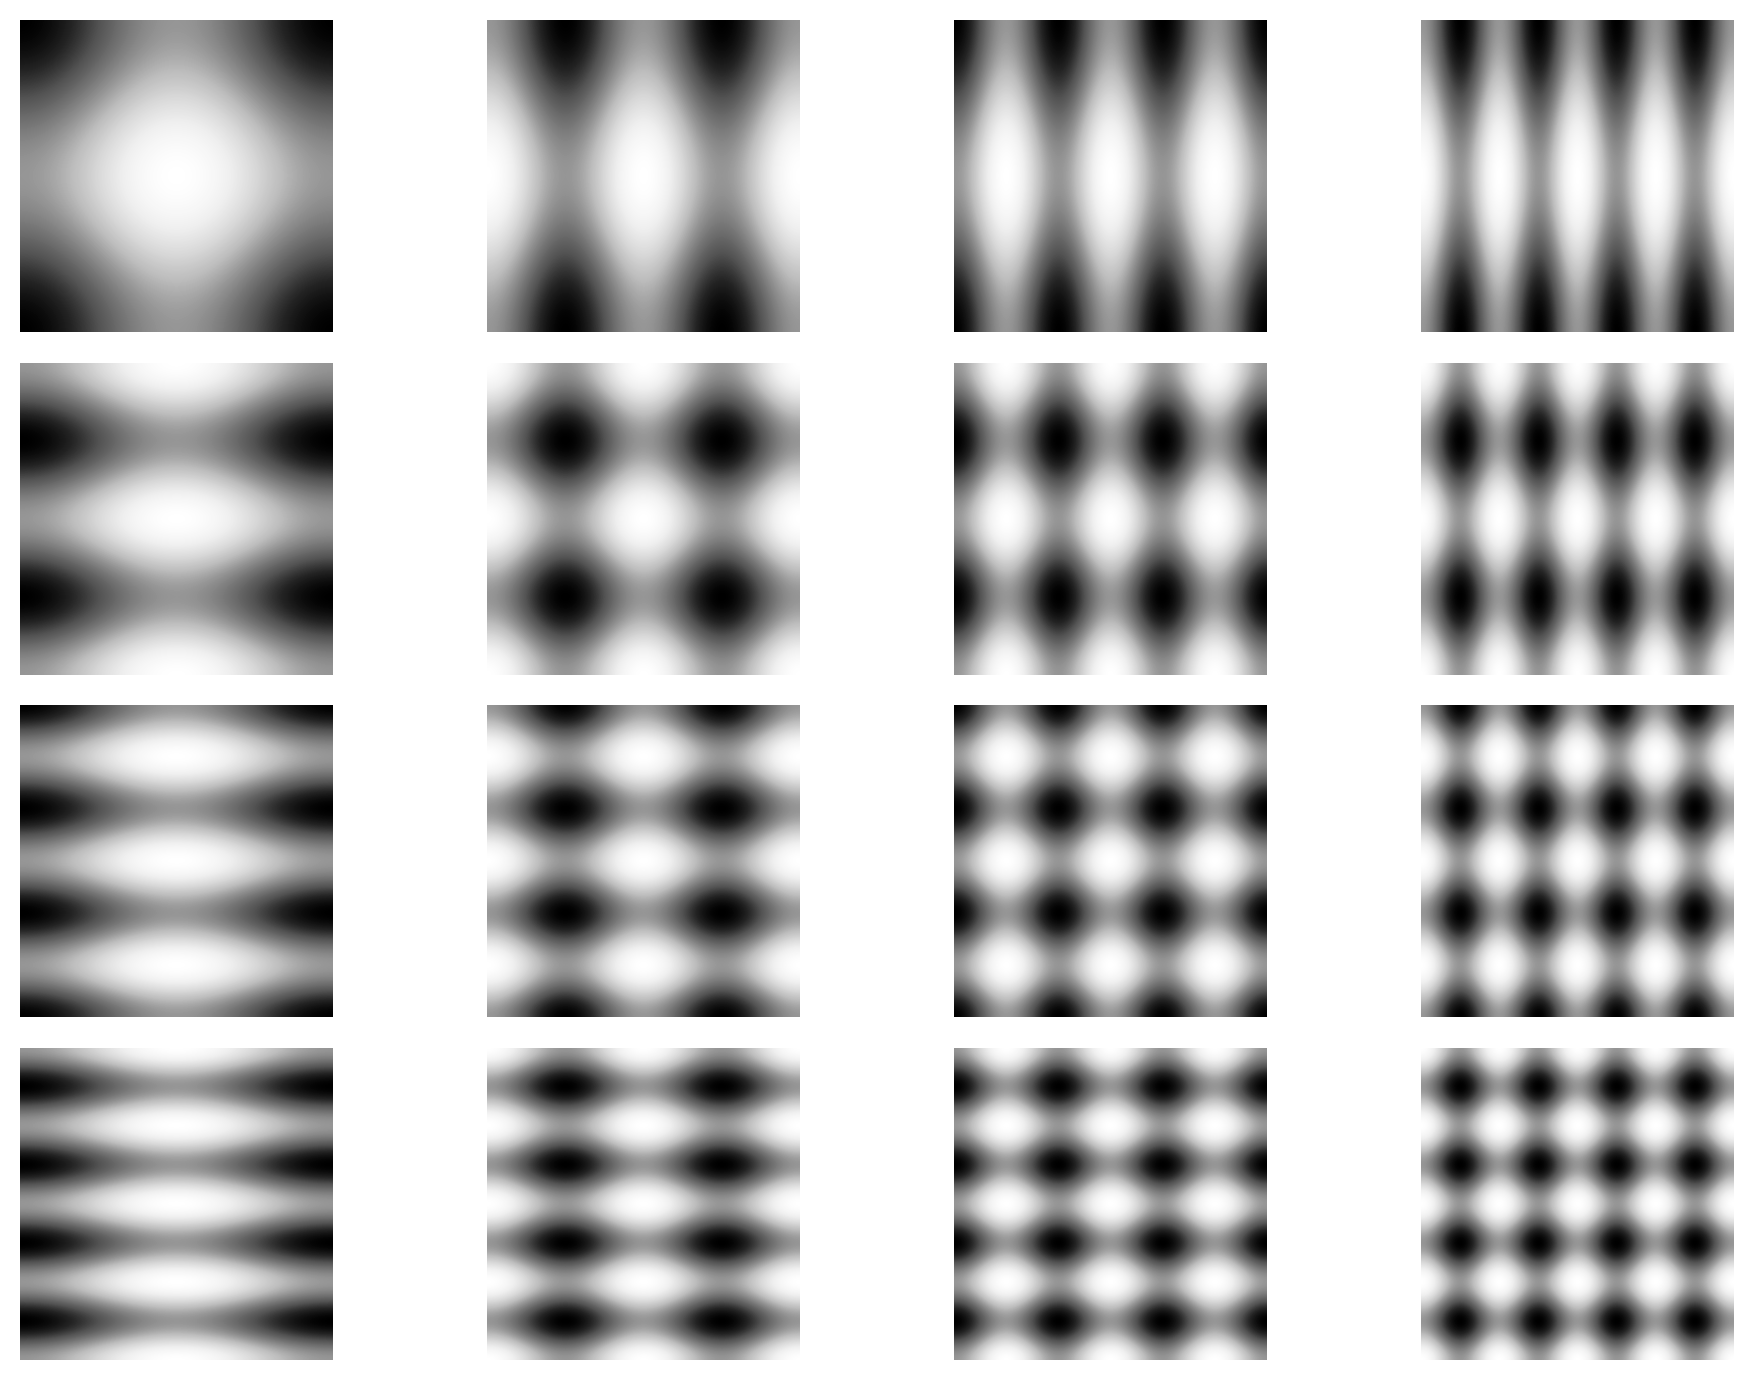

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

size_x = 500
size_y = 500

x = np.arange(-size_x, size_x, 1)
y = np.arange(-size_y, size_y, 1)
X, Y = np.meshgrid(x, y)


max_plots_x = 4
max_plots_y = 4
fig, axs = plt.subplots(max_plots_x,max_plots_y)
for row in range(max_plots_y):
    for col in range(max_plots_x):
        wavelength_x = (size_x*2) / (col+1)
        wavelength_y = (size_y*2) / (row+1)
        grating = np.cos(2 * np.pi * X / wavelength_x) + np.cos(2 * np.pi * Y / wavelength_y)
        axs[row,col].imshow(grating, cmap=cm.Greys_r)
        axs[row,col].axis("off")

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

plt.tight_layout()
plt.show()
